In [1]:
import numpy as np
import os
import monai
import monai.transforms as transforms
import matplotlib
import matplotlib.pyplot as plt
from ipywidgets import interact
import torch
%matplotlib inline

In [230]:
import numpy as np
from scipy.ndimage import gaussian_filter

volume = np.zeros((50, 50, 50), dtype=np.float32)
volume[25, 25, 25] = 1.0
volume[10, 10, 10] = 1.0
print(np.average(volume))

volume = gaussian_filter(volume, 10, axes=(0,1,2))

1.6e-05


9.944683e-05
4.9644555e-08
1.0
0.000499207
------
0.6618944
0.00518347


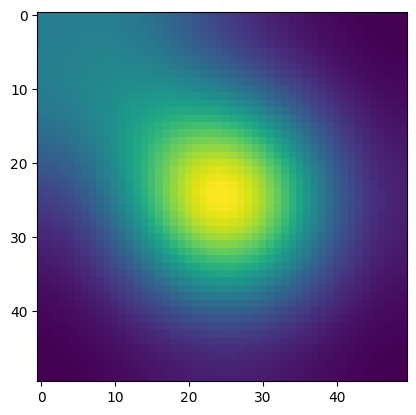

In [229]:
print(np.max(volume))
print(np.min(volume))
volume = volume / np.max(volume)
print(np.max(volume))
print(np.min(volume))
slice = 25
print('------')
print(np.max(volume[slice]))
print(np.min(volume[slice]))

plt.imshow(volume[slice, :, :], cmap="viridis")


In [ ]:
from scipy.ndimage import gaussian_filter
import numpy as np

def get_heatmap(shape, pts, radius):
    volume = np.zeros(shape, dtype=np.float32)
    for pt in pts: 
        pt = tuple(pt)
        volume[pt] = 1.0
    print(np.count_nonzero(volume))
    volume = gaussian_filter(volume, radius, axes=(0,1,2))
    volume = volume / np.max(volume)
    return volume

In [ ]:
from scipy.ndimage import gaussian_filter
import numpy as np

def get_heatmap(shape, pts, radius):
    volume = np.zeros(shape, dtype=np.float32)
    for pt in pts: 
        pt = tuple(pt)
        volume[pt] = 1.0
    print(np.count_nonzero(volume))
    volume = gaussian_filter(volume, radius, axes=(0,1,2))
    volume = volume / np.max(volume)
    return volume

pts = ([10,10,10],[25,25,25])
heatmap = get_heatmap((50,50,50), pts, 10)

2


[[0.7798906  0.7807779  0.7823712  ... 0.00419305 0.00366669 0.00358479]
 [0.78077793 0.78167295 0.78328186 ... 0.00438409 0.00384098 0.00375091]
 [0.7823712  0.78328186 0.7849215  ... 0.00476808 0.00419135 0.00408482]
 ...
 [0.00419305 0.00438409 0.00476808 ... 0.00512667 0.00468132 0.00445944]
 [0.00366669 0.00384098 0.00419135 ... 0.00468132 0.0042747  0.00407207]
 [0.00358479 0.00375091 0.00408482 ... 0.00445944 0.00407207 0.00387906]]


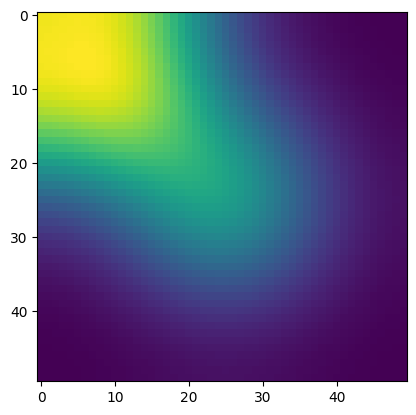

In [260]:
slice = 15
plt.imshow(heatmap[slice, :, :], cmap="viridis")
print(heatmap[slice, :, :])